# Predicting the Car Price using Machine Learning

In this project we will try to predict car sale price using machine learning. This is my first Machine Learning project. I am using the technique and workflow adapted from Daniel Bourke. You can check his course and his articles on https://www.mrdbourke.com/
    
The data is from the https://www.kaggle.com/CooperUnion/cardataset. 
    
This my first experiment in DS/ML project..... If you find something wrong or something else it's very good to receive advice, tips and critics from you. Thank You!!  

In [1]:
# import data analysis tools
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# import the data
car_feature = pd.read_csv("../project/car-features.csv", low_memory=False)
car_feature.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


In [3]:
car_feature.shape

(11914, 16)

This data contain 16 columns and 11914 rows

In [4]:
car_feature.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11914 entries, 0 to 11913
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Make               11914 non-null  object 
 1   Model              11914 non-null  object 
 2   Year               11914 non-null  int64  
 3   Engine Fuel Type   11911 non-null  object 
 4   Engine HP          11845 non-null  float64
 5   Engine Cylinders   11884 non-null  float64
 6   Transmission Type  11914 non-null  object 
 7   Driven_Wheels      11914 non-null  object 
 8   Number of Doors    11908 non-null  float64
 9   Market Category    8172 non-null   object 
 10  Vehicle Size       11914 non-null  object 
 11  Vehicle Style      11914 non-null  object 
 12  highway MPG        11914 non-null  int64  
 13  city mpg           11914 non-null  int64  
 14  Popularity         11914 non-null  int64  
 15  MSRP               11914 non-null  int64  
dtypes: float64(3), int64(5

In [5]:
# we can see there's still missing value in this Data Frame
car_feature.isna().sum()

Make                    0
Model                   0
Year                    0
Engine Fuel Type        3
Engine HP              69
Engine Cylinders       30
Transmission Type       0
Driven_Wheels           0
Number of Doors         6
Market Category      3742
Vehicle Size            0
Vehicle Style           0
highway MPG             0
city mpg                0
Popularity              0
MSRP                    0
dtype: int64

In [6]:
# counts of unique values
car_feature['Market Category'].value_counts()

Crossover                                          1110
Flex Fuel                                           872
Luxury                                              855
Luxury,Performance                                  673
Hatchback                                           641
                                                   ... 
Performance,Hybrid                                    1
Exotic,Luxury,High-Performance,Hybrid                 1
Crossover,Exotic,Luxury,Performance                   1
Crossover,Exotic,Luxury,High-Performance              1
Flex Fuel,Factory Tuner,Luxury,High-Performance       1
Name: Market Category, Length: 71, dtype: int64

In [7]:
# generate descriptive numeric statistics 
car_feature.describe()

,Year,Engine HP,Engine Cylinders,Number of Doors,highway MPG,city mpg,Popularity,MSRP
count,11914.000000,11845.00000,11884.000000,11908.000000,11914.000000,11914.000000,11914.000000,1.191400e+04
mean,2010.384338,249.38607,5.628829,3.436093,26.637485,19.733255,1554.911197,4.059474e+04
std,7.579740,109.19187,1.780559,0.881315,8.863001,8.987798,1441.855347,6.010910e+04
min,1990.000000,55.00000,0.000000,2.000000,12.000000,7.000000,2.000000,2.000000e+03
25%,2007.000000,170.00000,4.000000,2.000000,22.000000,16.000000,549.000000,2.100000e+04
50%,2015.000000,227.00000,6.000000,4.000000,26.000000,18.000000,1385.000000,2.999500e+04
75%,2016.000000,300.00000,6.000000,4.000000,30.000000,22.000000,2009.000000,4.223125e+04
max,2017.000000,1001.00000,16.000000,4.000000,354.000000,137.000000,5657.000000,2.065902e+06


## Data Dictionary

1. Make = Car company name
2. Model = Car Model 
3. Year = Production year
4. Engine Fuel Type = 10 categories
5. Engine HP = 356 different engine
6. Engine Cylinders = 8 categories and 1 zero 
7. Transmission Type = 4 categories and 1 unknown
8. Driven_Wheels = 4 categories based on wheel drive
9. Numbers of Doors = 3 categories
10. Market Category = 71 categories
11. Vehicle Size = 3 categories
12. Vehicle Style = 16 categories
13. Highway MPG = the average a car will get while driving on an open stretch of road without stopping or starting, typically at a higher speed.
14. city MPG = the score a car will get on average in city conditions, with stopping and starting at lower speeds.
15. Popularity 
16. MSRP = MSRP stands for the Manufacturer Suggested Retail Price — also known as “sticker” price — which is a recommended selling price that automakers give a new car.(Target feature)

In [8]:
car_feature.columns

Index(['Make', 'Model', 'Year', 'Engine Fuel Type', 'Engine HP',
       'Engine Cylinders', 'Transmission Type', 'Driven_Wheels',
       'Number of Doors', 'Market Category', 'Vehicle Size', 'Vehicle Style',
       'highway MPG', 'city mpg', 'Popularity', 'MSRP'],
      dtype='object')

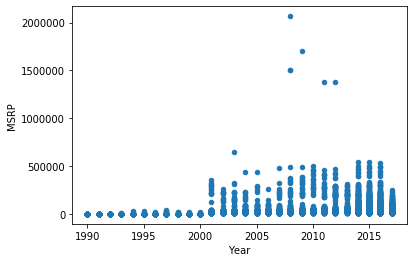

In [9]:
# plotting year and MSRP feature
car_feature.plot(x='Year', y='MSRP', kind='scatter');

In [10]:
# Copy the original Data Frame
cf = car_feature.copy()

In [11]:
cf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11914 entries, 0 to 11913
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Make               11914 non-null  object 
 1   Model              11914 non-null  object 
 2   Year               11914 non-null  int64  
 3   Engine Fuel Type   11911 non-null  object 
 4   Engine HP          11845 non-null  float64
 5   Engine Cylinders   11884 non-null  float64
 6   Transmission Type  11914 non-null  object 
 7   Driven_Wheels      11914 non-null  object 
 8   Number of Doors    11908 non-null  float64
 9   Market Category    8172 non-null   object 
 10  Vehicle Size       11914 non-null  object 
 11  Vehicle Style      11914 non-null  object 
 12  highway MPG        11914 non-null  int64  
 13  city mpg           11914 non-null  int64  
 14  Popularity         11914 non-null  int64  
 15  MSRP               11914 non-null  int64  
dtypes: float64(3), int64(5

In [12]:
# transpose column to see all features 
cf.head().T

,0,1,2,3,4
Make,BMW,BMW,BMW,BMW,BMW
Model,1 Series M,1 Series,1 Series,1 Series,1 Series
Year,2011,2011,2011,2011,2011
Engine Fuel Type,premium unleaded (required),premium unleaded (required),premium unleaded (required),premium unleaded (required),premium unleaded (required)
Engine HP,335,300,300,230,230
Engine Cylinders,6,6,6,6,6
Transmission Type,MANUAL,MANUAL,MANUAL,MANUAL,MANUAL
Driven_Wheels,rear wheel drive,rear wheel drive,rear wheel drive,rear wheel drive,rear wheel drive
Number of Doors,2,2,2,2,2
Market Category,"Factory Tuner,Luxury,High-Performance","Luxury,Performance","Luxury,High-Performance","Luxury,Performance",Luxury


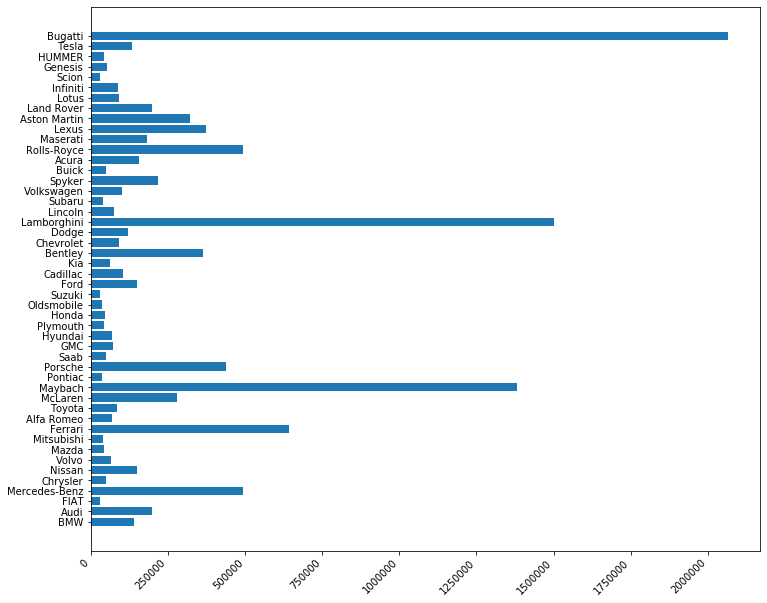

In [13]:
# Visualize Make and MSRP feature to see their distribution
fig, ax = plt.subplots(figsize=(12,10))
ax.barh(cf['Make'], cf['MSRP']);
labels = ax.get_xticklabels()
plt.setp(labels, rotation=45, horizontalalignment='right');

In [14]:
# uniques are returned in order of appearance
cf['Transmission Type'].unique()

array(['MANUAL', 'AUTOMATIC', 'AUTOMATED_MANUAL', 'DIRECT_DRIVE',
       'UNKNOWN'], dtype=object)

In [15]:
# show all wagon car style
cf[cf['Vehicle Style'] == "Wagon"]

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
19,Audi,100,1992,regular unleaded,172.0,6.0,AUTOMATIC,all wheel drive,4.0,Luxury,Midsize,Wagon,20,16,3105,2000
23,Audi,100,1993,regular unleaded,172.0,6.0,AUTOMATIC,all wheel drive,4.0,Luxury,Midsize,Wagon,20,16,3105,2000
27,Audi,100,1994,regular unleaded,172.0,6.0,AUTOMATIC,front wheel drive,4.0,Luxury,Midsize,Wagon,21,16,3105,2000
31,Audi,100,1994,regular unleaded,172.0,6.0,AUTOMATIC,all wheel drive,4.0,Luxury,Midsize,Wagon,21,16,3105,2000
59,Audi,200,1990,regular unleaded,162.0,5.0,MANUAL,all wheel drive,4.0,Luxury,Midsize,Wagon,22,15,3105,2000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11619,Volvo,XC70,2016,regular unleaded,240.0,4.0,AUTOMATIC,front wheel drive,4.0,"Crossover,Luxury",Midsize,Wagon,31,23,870,37100
11620,Volvo,XC70,2016,regular unleaded,240.0,4.0,AUTOMATIC,front wheel drive,4.0,"Crossover,Luxury",Midsize,Wagon,31,23,870,45675
11621,Volvo,XC70,2016,regular unleaded,250.0,5.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Luxury",Midsize,Wagon,26,19,870,42050
11622,Volvo,XC70,2016,regular unleaded,240.0,4.0,AUTOMATIC,front wheel drive,4.0,"Crossover,Luxury",Midsize,Wagon,31,23,870,40550


In order to build a model for this Data Frame, we need to check:
1. Is all the data numerical or not?...... If the data isn't numeric we must turn them into numeric or categories.
2. Is there still any missing values?..... If there are still any empty values we must fill them.

In [16]:
cf.dtypes

Make                  object
Model                 object
Year                   int64
Engine Fuel Type      object
Engine HP            float64
Engine Cylinders     float64
Transmission Type     object
Driven_Wheels         object
Number of Doors      float64
Market Category       object
Vehicle Size          object
Vehicle Style         object
highway MPG            int64
city mpg               int64
Popularity             int64
MSRP                   int64
dtype: object

We can see there's still any object data type. We must turn them into categorical/numeric......

In [17]:
cf.isna().sum()

Make                    0
Model                   0
Year                    0
Engine Fuel Type        3
Engine HP              69
Engine Cylinders       30
Transmission Type       0
Driven_Wheels           0
Number of Doors         6
Market Category      3742
Vehicle Size            0
Vehicle Style           0
highway MPG             0
city mpg                0
Popularity              0
MSRP                    0
dtype: int64

We still have missing values.... Let's fill them with numerical data type.

In [18]:
# We are using for loop to print features with string data type
for label, content in cf.items():
    if pd.api.types.is_string_dtype(content):
        print(label)

Make
Model
Engine Fuel Type
Transmission Type
Driven_Wheels
Market Category
Vehicle Size
Vehicle Style


We have 8 features with string data type. In order to use machine learning estimator, we must turn string data type to numerical/categorical data type..... so that we can make predictions with our model.

In [19]:
# Turn all features with string data type into categories
for label, content in cf.items():
    if pd.api.types.is_string_dtype(content):
        cf[label] = content.astype('category').cat.as_ordered()

You can check pandas documentation for pandas categorical data type. Now all of string data types already turned into categories.

In [20]:
cf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11914 entries, 0 to 11913
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   Make               11914 non-null  category
 1   Model              11914 non-null  category
 2   Year               11914 non-null  int64   
 3   Engine Fuel Type   11911 non-null  category
 4   Engine HP          11845 non-null  float64 
 5   Engine Cylinders   11884 non-null  float64 
 6   Transmission Type  11914 non-null  category
 7   Driven_Wheels      11914 non-null  category
 8   Number of Doors    11908 non-null  float64 
 9   Market Category    8172 non-null   category
 10  Vehicle Size       11914 non-null  category
 11  Vehicle Style      11914 non-null  category
 12  highway MPG        11914 non-null  int64   
 13  city mpg           11914 non-null  int64   
 14  Popularity         11914 non-null  int64   
 15  MSRP               11914 non-null  int64   
dtypes: c

In [21]:
cf['Engine Fuel Type'].cat.categories

Index(['diesel', 'electric', 'flex-fuel (premium unleaded recommended/E85)',
       'flex-fuel (premium unleaded required/E85)', 'flex-fuel (unleaded/E85)',
       'flex-fuel (unleaded/natural gas)', 'natural gas',
       'premium unleaded (recommended)', 'premium unleaded (required)',
       'regular unleaded'],
      dtype='object')

In [22]:
cf['Engine Fuel Type'].cat.codes

0        8
1        8
2        8
3        8
4        8
        ..
11909    8
11910    8
11911    8
11912    7
11913    9
Length: 11914, dtype: int8

In [23]:
cf['Market Category'].cat.categories

Index(['Crossover', 'Crossover,Diesel',
       'Crossover,Exotic,Luxury,High-Performance',
       'Crossover,Exotic,Luxury,Performance',
       'Crossover,Factory Tuner,Luxury,High-Performance',
       'Crossover,Factory Tuner,Luxury,Performance',
       'Crossover,Factory Tuner,Performance', 'Crossover,Flex Fuel',
       'Crossover,Flex Fuel,Luxury', 'Crossover,Flex Fuel,Luxury,Performance',
       'Crossover,Flex Fuel,Performance', 'Crossover,Hatchback',
       'Crossover,Hatchback,Factory Tuner,Performance',
       'Crossover,Hatchback,Luxury', 'Crossover,Hatchback,Performance',
       'Crossover,Hybrid', 'Crossover,Luxury', 'Crossover,Luxury,Diesel',
       'Crossover,Luxury,High-Performance', 'Crossover,Luxury,Hybrid',
       'Crossover,Luxury,Performance', 'Crossover,Luxury,Performance,Hybrid',
       'Crossover,Performance', 'Diesel', 'Diesel,Luxury',
       'Exotic,Factory Tuner,High-Performance',
       'Exotic,Factory Tuner,Luxury,High-Performance',
       'Exotic,Factory Tun

In [24]:
for label, content in cf.items():
    if not pd.api.types.is_numeric_dtype(content):
        cf[label] = pd.Categorical(content).codes+1

In [25]:
cf['Market Category'].value_counts()

0     3742
1     1110
42     872
64     855
68     673
      ... 
34       1
3        1
4        1
44       1
71       1
Name: Market Category, Length: 72, dtype: int64

Now let's see our Data Frame.....

In [26]:
cf.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,5,2,2011,9,335.0,6.0,4,4,2.0,39,1,9,26,19,3916,46135
1,5,1,2011,9,300.0,6.0,4,4,2.0,68,1,7,28,19,3916,40650
2,5,1,2011,9,300.0,6.0,4,4,2.0,65,1,9,28,20,3916,36350
3,5,1,2011,9,230.0,6.0,4,4,2.0,68,1,9,28,18,3916,29450
4,5,1,2011,9,230.0,6.0,4,4,2.0,64,1,7,28,18,3916,34500


Now all of our data is in numerical type. We've been accessed the codes in our categorical data type. The number in categorical features shows the code for each category..... But we still have missing value.

In [27]:
cf.isna().sum()

Make                  0
Model                 0
Year                  0
Engine Fuel Type      0
Engine HP            69
Engine Cylinders     30
Transmission Type     0
Driven_Wheels         0
Number of Doors       6
Market Category       0
Vehicle Size          0
Vehicle Style         0
highway MPG           0
city mpg              0
Popularity            0
MSRP                  0
dtype: int64

Let's fill the missing value in numerical features with median. 

In [28]:
for label, content in cf.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isna(content).sum():
            cf[label] = content.fillna(content.median())

In [29]:
cf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11914 entries, 0 to 11913
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Make               11914 non-null  int8   
 1   Model              11914 non-null  int16  
 2   Year               11914 non-null  int64  
 3   Engine Fuel Type   11914 non-null  int8   
 4   Engine HP          11914 non-null  float64
 5   Engine Cylinders   11914 non-null  float64
 6   Transmission Type  11914 non-null  int8   
 7   Driven_Wheels      11914 non-null  int8   
 8   Number of Doors    11914 non-null  float64
 9   Market Category    11914 non-null  int8   
 10  Vehicle Size       11914 non-null  int8   
 11  Vehicle Style      11914 non-null  int8   
 12  highway MPG        11914 non-null  int64  
 13  city mpg           11914 non-null  int64  
 14  Popularity         11914 non-null  int64  
 15  MSRP               11914 non-null  int64  
dtypes: float64(3), int16(1

In [30]:
cf.isna().sum()

Make                 0
Model                0
Year                 0
Engine Fuel Type     0
Engine HP            0
Engine Cylinders     0
Transmission Type    0
Driven_Wheels        0
Number of Doors      0
Market Category      0
Vehicle Size         0
Vehicle Style        0
highway MPG          0
city mpg             0
Popularity           0
MSRP                 0
dtype: int64

All of our data is in numerical..... Let's start build a model.

## Modelling

In [31]:
from sklearn.model_selection import train_test_split

X = cf.drop('MSRP', axis=1)
y = cf['MSRP']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((9531, 15), (2383, 15), (9531,), (2383,))

Let's choose models from sklearn ML maps in https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html

Because we're dealing with regression problem let's pick a few estimators in regression area and test them.

In [32]:
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import Ridge
from sklearn.ensemble import RandomForestRegressor

models = {
    "Elastic Net": ElasticNet(),
    "Ridge": Ridge(),
    "Random Forest": RandomForestRegressor()
}

# make function for fit and score model
def fit_score(models, X_train, X_test, y_train, y_test):
    """
    Fits and evaluate ML models.
    """
    model_scores = {}
    for name, model in models.items():
        np.random.seed(42)
        model.fit(X_train, y_train)
        model_scores[name] = model.score(X_test, y_test)
    return model_scores
    

In [33]:
model_result = fit_score(models, X_train, X_test, y_train, y_test)
model_result

{'Elastic Net': 0.5839766118700691,
 'Ridge': 0.5834914037621722,
 'Random Forest': 0.9804478576151605}

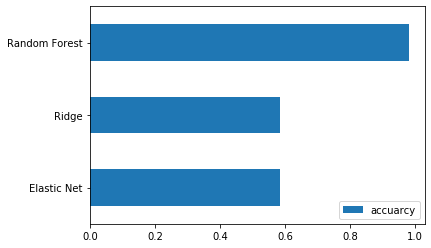

In [34]:
model_compare = pd.DataFrame(model_result, index=['accuarcy'])
model_compare.T.plot.barh();

RandomForestRegressor() seems doing very well, but we must evaluate the model. Because we don't want our model overfitting or underfitting.....

Let's tune our hyperparameter models so that we can see if our models can improve.

### Hyperparameter Tuning

In this project we will try to tune our models with `RandomizedSearchCV()`. It's one of the method for tuning hyperparameter. 

In [35]:
# Hyperparameter tuning ElasticNet
from sklearn.model_selection import RandomizedSearchCV

hyper_params_EN = {
    "normalize": [True, False],
    "alpha": [0.01, 0.1,1,10,100,1000],
    "l1_ratio" : [0.25,0.5,0.75,1],
    "selection": ['cyclic', 'random']
}

rs_EN = RandomizedSearchCV(ElasticNet(), param_distributions=hyper_params_EN, cv=5, n_iter=20, verbose=True, random_state=42)
rs_EN.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.9s finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=ElasticNet(alpha=1.0, copy_X=True,
                                        fit_intercept=True, l1_ratio=0.5,
                                        max_iter=1000, normalize=False,
                                        positive=False, precompute=False,
                                        random_state=None, selection='cyclic',
                                        tol=0.0001, warm_start=False),
                   iid='deprecated', n_iter=20, n_jobs=None,
                   param_distributions={'alpha': [0.01, 0.1, 1, 10, 100, 1000],
                                        'l1_ratio': [0.25, 0.5, 0.75, 1],
                                        'normalize': [True, False],
                                        'selection': ['cyclic', 'random']},
                   pre_dispatch='2*n_jobs', random_state=42, refit=True,
                   return_train_score=False, scoring=None, verbose=True)

In [36]:
rs_EN.best_params_

{'selection': 'cyclic', 'normalize': False, 'l1_ratio': 1, 'alpha': 1000}

In [37]:
rs_EN.score(X_test, y_test)

0.5851823086459937

In [38]:
# Hyperparameter tuning Ridge 
hyper_params_Ridge = {
    'alpha':[200, 230, 250,265, 270, 275, 290, 300, 500],
    "normalize": [True, False]
}

rs_ridge = RandomizedSearchCV(Ridge(), param_distributions=hyper_params_Ridge, cv=5, n_iter=20, verbose=True, random_state=42)
rs_ridge.fit(X_train, y_train)

C:\Users\nrpra\ML_project\env\lib\site-packages\sklearn\model_selection\_search.py:277: UserWarning: The total space of parameters 18 is smaller than n_iter=20. Running 18 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 5 folds for each of 18 candidates, totalling 90 fits


[Parallel(n_jobs=1)]: Done  90 out of  90 | elapsed:    0.4s finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                                   max_iter=None, normalize=False,
                                   random_state=None, solver='auto',
                                   tol=0.001),
                   iid='deprecated', n_iter=20, n_jobs=None,
                   param_distributions={'alpha': [200, 230, 250, 265, 270, 275,
                                                  290, 300, 500],
                                        'normalize': [True, False]},
                   pre_dispatch='2*n_jobs', random_state=42, refit=True,
                   return_train_score=False, scoring=None, verbose=True)

In [39]:
rs_ridge.best_params_

{'normalize': False, 'alpha': 500}

In [40]:
rs_ridge.score(X_test, y_test)

0.5849417578255693

In the experiment above, we can see the score test improved a little bit but not too significant....... We can try to search hyperparameter with `GridSearchCV()`. 

But for now let's focus on `RandomForestRegressor()`. Let's try to improve it with `RandomizedSearchCV()`.

In [41]:
# Retrain data with RandomForestRegressor()

rfr = RandomForestRegressor(n_jobs=-1, random_state=42)
rfr.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=-1, oob_score=False,
                      random_state=42, verbose=0, warm_start=False)

In [42]:
rfr.score(X_test, y_test)

0.9804478576151605

I don't know, i think 0.98 is too much perfect for a model..... Let's try to improve it with `RandomizedSearchCV` and using evaluation metrics.

In [43]:
# Let's see rfr model hyperparameters
from pprint import pprint
pprint(rfr.get_params())

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'mse',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': -1,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}


In [44]:
# create parameter grid 

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
# max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4, 10]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

In [45]:
# %%time
# rs_model = RandomizedSearchCV(rfr, param_distributions=random_grid, cv=5, n_iter=20, verbose=True)

# rs_model.fit(X_train, y_train)

In [46]:
# rs_model.best_params_

In [51]:
%%time
# train with the best parameters
ideal_rf = RandomForestRegressor(n_estimators=600, min_samples_leaf=1, min_samples_split=5, max_features='sqrt',
                                max_depth=110, bootstrap=False, n_jobs=-1, random_state=42)
ideal_rf.fit(X_train, y_train)

Wall time: 3.62 s


RandomForestRegressor(bootstrap=False, ccp_alpha=0.0, criterion='mse',
                      max_depth=110, max_features='sqrt', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=5, min_weight_fraction_leaf=0.0,
                      n_estimators=600, n_jobs=-1, oob_score=False,
                      random_state=42, verbose=0, warm_start=False)

In [52]:
ideal_rf.score(X_test, y_test)

0.9788826300488361

In [53]:
test_preds = ideal_rf.predict(X_test)

In [54]:
from sklearn.metrics import r2_score

r2_score(y_test, test_preds)

0.9788826300488361

In [57]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, explained_variance_score

# create evaluation test set function
def evaluate_test(model):
    test_preds = model.predict(X_test)
    test_scores = {
        "Mean Squared Error": mean_squared_error(y_test, test_preds),
        "Root Mean Squared Error": np.sqrt(mean_squared_error(y_test, test_preds)),
        "Mean Absolute Error": mean_absolute_error(y_test, test_preds),
        "R^2 Score": r2_score(y_test, test_preds),
        "Explained Variance Score": explained_variance_score(y_test, test_preds)
    }
    return test_scores

In [58]:
base_metrics = evaluate_test(rfr)
base_metrics

{'Mean Squared Error': 46603899.60727909,
 'Root Mean Squared Error': 6826.704886493856,
 'Mean Absolute Error': 2980.1272216857687,
 'R^2 Score': 0.9804478576151604,
 'Explained Variance Score': 0.9804479404982648}

In [59]:
ideal_metrics = evaluate_test(ideal_rf)
ideal_metrics

{'Mean Squared Error': 50334729.04416385,
 'Root Mean Squared Error': 7094.6972482385645,
 'Mean Absolute Error': 2942.2875834426322,
 'R^2 Score': 0.9788826300488361,
 'Explained Variance Score': 0.9788900180016976}

In [60]:
# find feature importance 
ideal_rf.feature_importances_

array([0.03850609, 0.06554709, 0.04427113, 0.04034694, 0.26865846,
       0.21488143, 0.01925132, 0.00962046, 0.00882138, 0.05093015,
       0.00997532, 0.01952408, 0.0537947 , 0.11872359, 0.03714786])

Feature importance seeks to figure out which different attributes of the data were most importance when it comes to predicting the **target variable** (MSRP).

In [62]:
# plotting feature importance 
def plot_feat(columns, importances, n=20):
    df = (pd.DataFrame({
        "features": columns,
        "feature_importances": importances
    }).sort_values("feature_importances", ascending=False).reset_index(drop=True))
    
    # plot the DataFrame
    fig, ax = plt.subplots()
    ax.barh(df['features'][:20], df['feature_importances'][:n])
    ax.set_ylabel("Features")
    ax.set_xlabel("Feature Importance")
    ax.invert_yaxis()

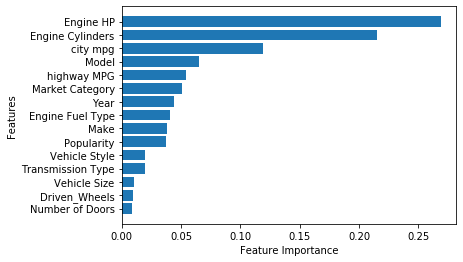

In [63]:
plot_feat(X_train.columns, ideal_rf.feature_importances_)